In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/UNB/Multi/Base_classifier_result(HTML cross)(3).csv")
data.head()

,labels,mlp_prediction_non,mlp_prediction_phish,mlp_prediction_spam,mlp_prediction_malware,mlp_prediction_defacemen,nn_prediction_non,nn_prediction_phish,nn_prediction_spam,nn_prediction_malware,nn_prediction_defacemen,nn2_prediction_non,nn2_prediction_phish,nn2_prediction_spam,nn2_prediction_malware,nn2_prediction_defacemen
0,2,3.285955e-08,2.275952e-38,1.000000e+00,3.536448e-103,5.452580e-62,3.285955e-08,2.275952e-38,1.000000e+00,3.536448e-103,5.452580e-62,3.285955e-08,2.275952e-38,1.000000e+00,3.536448e-103,5.452580e-62
1,0,9.871709e-01,1.400658e-05,8.887072e-04,3.094047e-04,1.161696e-02,9.871709e-01,1.400658e-05,8.887072e-04,3.094047e-04,1.161696e-02,9.871709e-01,1.400658e-05,8.887072e-04,3.094047e-04,1.161696e-02
2,2,5.431999e-03,7.265198e-03,9.751261e-01,1.063568e-02,1.541009e-03,5.431999e-03,7.265198e-03,9.751261e-01,1.063568e-02,1.541009e-03,5.431999e-03,7.265198e-03,9.751261e-01,1.063568e-02,1.541009e-03
3,3,6.821167e-02,8.999669e-02,4.175485e-02,7.832318e-01,1.680500e-02,6.821167e-02,8.999669e-02,4.175485e-02,7.832318e-01,1.680500e-02,6.821167e-02,8.999669e-02,4.175485e-02,7.832318e-01,1.680500e-02
4,0,1.000000e+00,9.884499e-29,3.997525e-14,4.412196e-13,2.773055e-33,1.000000e+00,9.884499e-29,3.997525e-14,4.412196e-13,2.773055e-33,1.000000e+00,9.884499e-29,3.997525e-14,4.412196e-13,2.773055e-33


In [ ]:
data.shape

(6896, 16)

In [ ]:
data.columns

Index(['labels', 'mlp_prediction_non', 'mlp_prediction_phish',
       'mlp_prediction_spam', 'mlp_prediction_malware',
       'mlp_prediction_defacemen', 'nn_prediction_non', 'nn_prediction_phish',
       'nn_prediction_spam', 'nn_prediction_malware',
       'nn_prediction_defacemen', 'nn2_prediction_non', 'nn2_prediction_phish',
       'nn2_prediction_spam', 'nn2_prediction_malware',
       'nn2_prediction_defacemen'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   labels                    6896 non-null   int64  
 1   mlp_prediction_non        6896 non-null   float64
 2   mlp_prediction_phish      6896 non-null   float64
 3   mlp_prediction_spam       6896 non-null   float64
 4   mlp_prediction_malware    6896 non-null   float64
 5   mlp_prediction_defacemen  6896 non-null   float64
 6   nn_prediction_non         6896 non-null   float64
 7   nn_prediction_phish       6896 non-null   float64
 8   nn_prediction_spam        6896 non-null   float64
 9   nn_prediction_malware     6896 non-null   float64
 10  nn_prediction_defacemen   6896 non-null   float64
 11  nn2_prediction_non        6896 non-null   float64
 12  nn2_prediction_phish      6896 non-null   float64
 13  nn2_prediction_spam       6896 non-null   float64
 14  nn2_pred

In [ ]:
import numpy as np

y_f = data['labels']
x_f = data.drop('labels',axis=1)

x = np.array(x_f)
y = y_f.values



print(x.shape, y.shape)




(6896, 15) (6896,)


In [ ]:
# one hot encoding

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()

encoder.fit(y)
en_y = encoder.transform(y)
dy = np_utils.to_categorical(en_y)



In [ ]:
import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_aa(x_training, x_val, y_training, y_val, opt, early_stopping_monitor):

  model = Sequential()
  model.add(Dense(10, input_dim=15, activation='relu'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer = opt, loss='mse', metrics=["accuracy"])

  # print("check point")
  history = model.fit(x_training, y_training, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()

  print('Validation Accuracy: ')
  y_pred = model.predict(x_val)
  Y_pred_classes = np.argmax(y_pred,axis = 1) 
  Y_true = np.argmax(y_val,axis = 1) 


  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(Y_true, Y_pred_classes))

  #target_names = ['True', 'False']
  print(classification_report(Y_true, Y_pred_classes))


  print(confusion_matrix(Y_true, Y_pred_classes))

  # print('Precision: %.4f' % precision_score(y_val, y_pred))
  # print('Recall: %.4f' % recall_score(y_val, y_pred))
  # print('F1 Score: %.4f' % f1_score(y_val, y_pred))
  # tn, fp, fn, tp = confusion_matrix(list(y_val), list(y_pred), labels=[0, 1]).ravel()

  # print('True Positive', tp)
  # print('True Negative', tn)
  # print('False Positive', fp)
  # print('False Negative', fn)


Epoch 1/100
194/194 [==============================] - 1s 2ms/step - loss: 0.2262 - accuracy: 0.2801 - val_loss: 0.1938 - val_accuracy: 0.4464
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.4942 - val_loss: 0.1331 - val_accuracy: 0.6812
Epoch 3/100
194/194 [==============================] - 0s 2ms/step - loss: 0.1144 - accuracy: 0.7098 - val_loss: 0.1025 - val_accuracy: 0.7130
Epoch 4/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0917 - accuracy: 0.7230 - val_loss: 0.0867 - val_accuracy: 0.7145
Epoch 5/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0816 - accuracy: 0.7380 - val_loss: 0.0797 - val_accuracy: 0.7507
Epoch 6/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0770 - accuracy: 0.7502 - val_loss: 0.0760 - val_accuracy: 0.7493
Epoch 7/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.7536 - val_loss: 0.0738 - val_accuracy: 0.7493

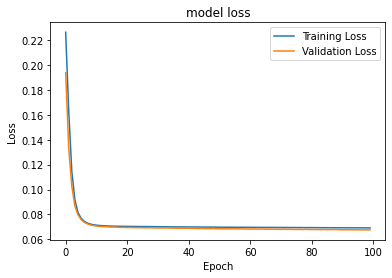

Validation Accuracy: 
Accuracy: 0.7710144927536232
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       207
           1       0.50      0.40      0.44        73
           2       0.83      0.77      0.80       124
           3       0.84      0.80      0.82       162
           4       0.71      0.72      0.71       124

    accuracy                           0.77       690
   macro avg       0.74      0.72      0.73       690
weighted avg       0.77      0.77      0.77       690

[[189   3   7   6   2]
 [ 20  29   1   8  15]
 [  8   8  95   0  13]
 [ 11  13   2 130   6]
 [ 10   5   9  11  89]]
Epoch 1/100
194/194 [==============================] - 1s 4ms/step - loss: 0.1384 - accuracy: 0.5936 - val_loss: 0.0871 - val_accuracy: 0.7449
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0818 - accuracy: 0.7245 - val_loss: 0.0730 - val_accuracy: 0.7362
Epoch 3/100
194/194 [==============================] - 0s 

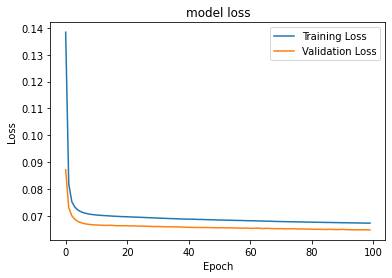

Validation Accuracy: 
Accuracy: 0.7710144927536232
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       239
           1       0.43      0.49      0.46        65
           2       0.83      0.76      0.79       145
           3       0.93      0.80      0.86       150
           4       0.62      0.70      0.66        91

    accuracy                           0.77       690
   macro avg       0.73      0.72      0.72       690
weighted avg       0.78      0.77      0.78       690

[[206  10   9   4  10]
 [ 12  32   4   4  13]
 [ 15   9 110   1  10]
 [ 11  11   2 120   6]
 [  7  13   7   0  64]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1446 - accuracy: 0.5603 - val_loss: 0.0944 - val_accuracy: 0.7014
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0876 - accuracy: 0.7141 - val_loss: 0.0821 - val_accuracy: 0.7261
Epoch 3/100
194/194 [==============================] - 0s 

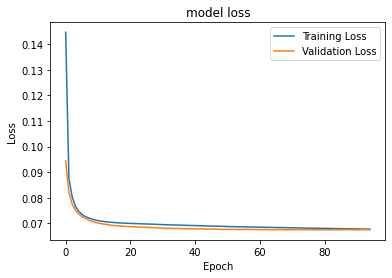

Validation Accuracy: 
Accuracy: 0.755072463768116
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       221
           1       0.45      0.26      0.33        72
           2       0.83      0.72      0.77       143
           3       0.94      0.85      0.89       156
           4       0.60      0.84      0.70        98

    accuracy                           0.76       690
   macro avg       0.71      0.70      0.70       690
weighted avg       0.76      0.76      0.75       690

[[185   3  11   3  19]
 [ 29  19   5   4  15]
 [ 22   3 103   1  14]
 [  5  12   1 132   6]
 [  6   5   4   1  82]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1248 - accuracy: 0.6848 - val_loss: 0.0848 - val_accuracy: 0.7507
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0789 - accuracy: 0.7573 - val_loss: 0.0751 - val_accuracy: 0.7406
Epoch 3/100
194/194 [==============================] - 0s 2

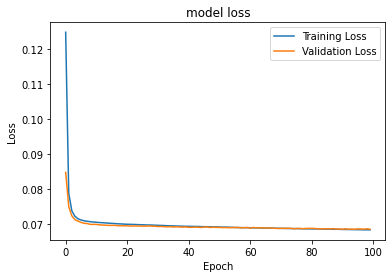

Validation Accuracy: 
Accuracy: 0.7695652173913043
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       232
           1       0.52      0.45      0.48        78
           2       0.78      0.73      0.75       124
           3       0.89      0.82      0.85       159
           4       0.71      0.79      0.75        97

    accuracy                           0.77       690
   macro avg       0.74      0.73      0.73       690
weighted avg       0.77      0.77      0.77       690

[[198  16   8   5   5]
 [ 16  35   8  10   9]
 [ 18   4  90   1  11]
 [ 14   7   0 131   7]
 [  4   5  10   1  77]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1586 - accuracy: 0.4679 - val_loss: 0.1136 - val_accuracy: 0.7275
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0996 - accuracy: 0.7282 - val_loss: 0.0867 - val_accuracy: 0.7464
Epoch 3/100
194/194 [==============================] - 0s 

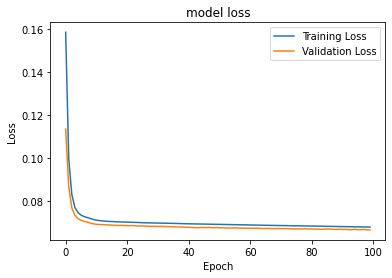

Validation Accuracy: 
Accuracy: 0.7724637681159421
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       230
           1       0.40      0.30      0.34        60
           2       0.77      0.78      0.77       127
           3       0.88      0.87      0.88       158
           4       0.72      0.71      0.72       115

    accuracy                           0.77       690
   macro avg       0.71      0.70      0.71       690
weighted avg       0.76      0.77      0.77       690

[[196  10  11   8   5]
 [ 19  18   3   5  15]
 [ 14   3  99   1  10]
 [  8   3   7 138   2]
 [  9  11   9   4  82]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1642 - accuracy: 0.5237 - val_loss: 0.1086 - val_accuracy: 0.7058
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0912 - accuracy: 0.7303 - val_loss: 0.0845 - val_accuracy: 0.7377
Epoch 3/100
194/194 [==============================] - 0s 

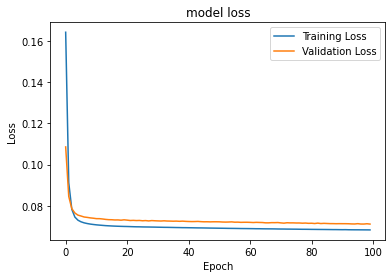

Validation Accuracy: 
Accuracy: 0.7681159420289855
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       218
           1       0.40      0.38      0.39        73
           2       0.89      0.74      0.81       149
           3       0.90      0.83      0.86       146
           4       0.73      0.74      0.73       104

    accuracy                           0.77       690
   macro avg       0.73      0.72      0.72       690
weighted avg       0.77      0.77      0.77       690

[[194  10   5   5   4]
 [ 25  28   4   4  12]
 [ 16  12 110   2   9]
 [ 14   7   0 121   4]
 [  7  13   5   2  77]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1348 - accuracy: 0.6237 - val_loss: 0.1002 - val_accuracy: 0.7083
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0870 - accuracy: 0.7342 - val_loss: 0.0841 - val_accuracy: 0.7271
Epoch 3/100
194/194 [==============================] - 0s 

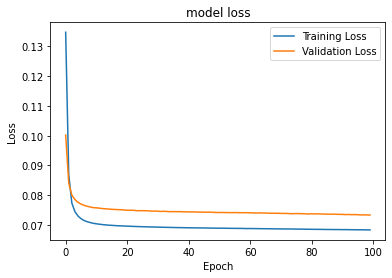

Validation Accuracy: 
Accuracy: 0.7648766328011611
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       203
           1       0.48      0.31      0.38        74
           2       0.87      0.71      0.78       138
           3       0.88      0.85      0.87       165
           4       0.69      0.84      0.76       109

    accuracy                           0.76       689
   macro avg       0.73      0.71      0.72       689
weighted avg       0.76      0.76      0.76       689

[[173   9   7   4  10]
 [ 24  23   4  11  12]
 [ 20   4  98   4  12]
 [ 13   3   1 141   7]
 [  5   9   3   0  92]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1427 - accuracy: 0.5172 - val_loss: 0.0971 - val_accuracy: 0.7271
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0865 - accuracy: 0.7269 - val_loss: 0.0796 - val_accuracy: 0.7576
Epoch 3/100
194/194 [==============================] - 0s 

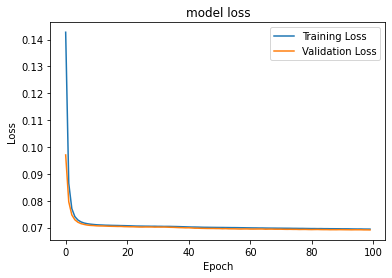

Validation Accuracy: 
Accuracy: 0.772133526850508
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       215
           1       0.38      0.46      0.42        70
           2       0.89      0.77      0.82       133
           3       0.87      0.90      0.88       153
           4       0.74      0.73      0.73       118

    accuracy                           0.77       689
   macro avg       0.74      0.73      0.73       689
weighted avg       0.78      0.77      0.78       689

[[175  19   5   6  10]
 [ 13  32   2  10  13]
 [ 16   8 102   3   4]
 [  3   9   0 137   4]
 [  9  16   6   1  86]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1442 - accuracy: 0.5539 - val_loss: 0.1029 - val_accuracy: 0.7039
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0903 - accuracy: 0.7277 - val_loss: 0.0817 - val_accuracy: 0.7460
Epoch 3/100
194/194 [==============================] - 0s 2

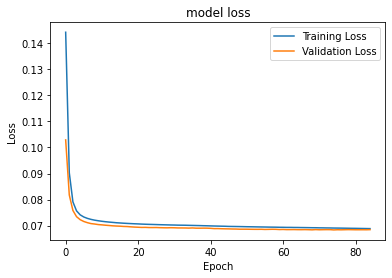

Validation Accuracy: 
Accuracy: 0.7619738751814223
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       227
           1       0.37      0.34      0.35        65
           2       0.91      0.75      0.82       141
           3       0.88      0.78      0.83       153
           4       0.70      0.78      0.74       103

    accuracy                           0.76       689
   macro avg       0.72      0.70      0.71       689
weighted avg       0.77      0.76      0.76       689

[[197  14   4   5   7]
 [ 17  22   5   9  12]
 [ 11   9 106   2  13]
 [ 23   6   2 120   2]
 [ 14   9   0   0  80]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1331 - accuracy: 0.6148 - val_loss: 0.0913 - val_accuracy: 0.7184
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0823 - accuracy: 0.7456 - val_loss: 0.0781 - val_accuracy: 0.7431
Epoch 3/100
194/194 [==============================] - 0s 

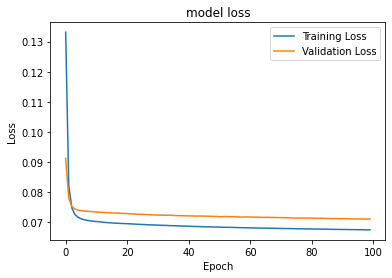

Validation Accuracy: 
Accuracy: 0.7576197387518142
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       202
           1       0.33      0.24      0.28        58
           2       0.88      0.73      0.80       147
           3       0.93      0.83      0.87       181
           4       0.65      0.76      0.70       101

    accuracy                           0.76       689
   macro avg       0.70      0.68      0.69       689
weighted avg       0.76      0.76      0.75       689

[[174  14   4   4   6]
 [ 22  14   1   6  15]
 [ 19   2 107   2  17]
 [ 18   6   4 150   3]
 [ 13   6   5   0  77]]


In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)


kf = KFold(n_splits=10, random_state=10, shuffle=True)
for train, val in kf.split(x, dy):
  model_aa(x[train], x[val], dy[train], dy[val], optimizer1, early_stopping_monitor)